In [25]:
# 실습: 주식 데이터 시계열 분석 (시뮬레이션)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Pretendard'
plt.rcParams['axes.unicode_minus'] = False

# 가상의 주식 데이터 생성
np.random.seed(42)

# 1년간의 일별 주식 데이터 생성
dates = pd.date_range('2023-01-01', '2023-12-31', freq='D')
n_days = len(dates)

# 주식 가격 시뮬레이션 (기하 브라운 운동)
initial_price = 100000  # 초기 가격
volatility = 0.02  # 일일 변동성
drift = 0.0005  # 일일 드리프트

# 가격 변화율 생성
returns = np.random.normal(drift, volatility, n_days)
returns[0] = 0  # 첫날은 변화 없음

# 누적곱으로 가격 계산
price_multipliers = (1 + returns).cumprod()
prices = initial_price * price_multipliers

# 거래량 생성 (가격 변동성과 반비례 관계)
base_volume = 1000000
volume = base_volume + np.random.normal(0, 200000, n_days) - np.abs(returns) * 5000000
volume = np.maximum(volume, 100000)  # 최소 거래량 보장

# 데이터프레임 생성
stock_data = pd.DataFrame({
    'date': dates,        # 날짜
    'close': prices,      # 가격
    'volume': volume,     # 거래량
    'returns': returns,   # 전날 대비 가격 변화율
})

stock_data.set_index('date', inplace=True)

# 고가, 저가, 시가 생성 (종가 기준)
# 시가를 기준으로 고가/저가를 생성
stock_data['open'] = stock_data['close'].shift(1) * (1 + np.random.normal(0, 0.005, n_days))
stock_data['open'].iloc[0] = initial_price

# 고가 = 시가보다 높은 값
stock_data['high'] = stock_data['open'] * (1 + np.abs(np.random.normal(0, 0.01, n_days)))

# 저가 = 시가보다 낮은 값
stock_data['low'] = stock_data['open'] * (1 - np.abs(np.random.normal(0, 0.01, n_days)))

/var/folders/tx/t7px7cn503bgk6zlg3m0b4740000gn/T/ipykernel_76808/1834160623.py:49: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  stock_data['open'].iloc[0] = initial_price


/var/folders/tx/t7px7cn503bgk6zlg3m0b4740000gn/T/ipykernel_76808/1512750858.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma_20'] = df['close'].rolling(window=20).mean()
/var/folders/tx/t7px7cn503bgk6zlg3m0b4740000gn/T/ipykernel_76808/1512750858.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma_60'] = df['close'].rolling(window=60).mean()


<Axes: xlabel='date'>

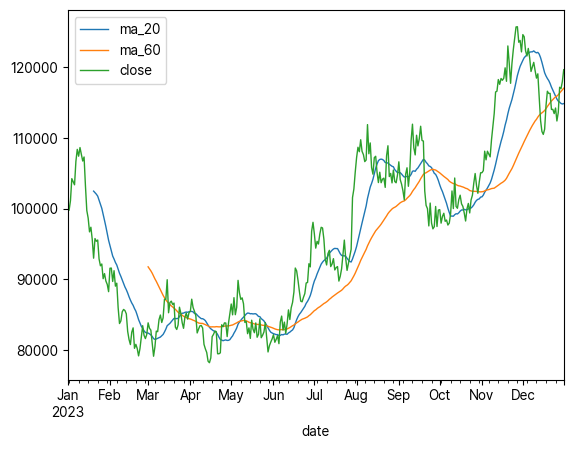

In [44]:
# 원래 해야하는 것 : 결측치 확인
stock_data.isna().sum() # 물론 없음

stock_data.head()   # 데이터 확인
df = stock_data[['volume', 'open', 'close', 'high', 'low', 'returns']]

df.head()  # 첫 5일 확인

# 여기부터 쌤 버전
ax = plt.gca()  # 현재 Axes 객체 가져오기
df['ma_20'] = df['close'].rolling(window=20).mean()
df['ma_60'] = df['close'].rolling(window=60).mean()
df[['ma_20', 'ma_60', 'close']].plot(label=['20-Day MA', '60-Day MA', 'Close Price'], linewidth=1, ax=ax)


/var/folders/tx/t7px7cn503bgk6zlg3m0b4740000gn/T/ipykernel_76808/21470291.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['volatility'] = df['returns'].rolling(window=20).std() * np.sqrt(252)


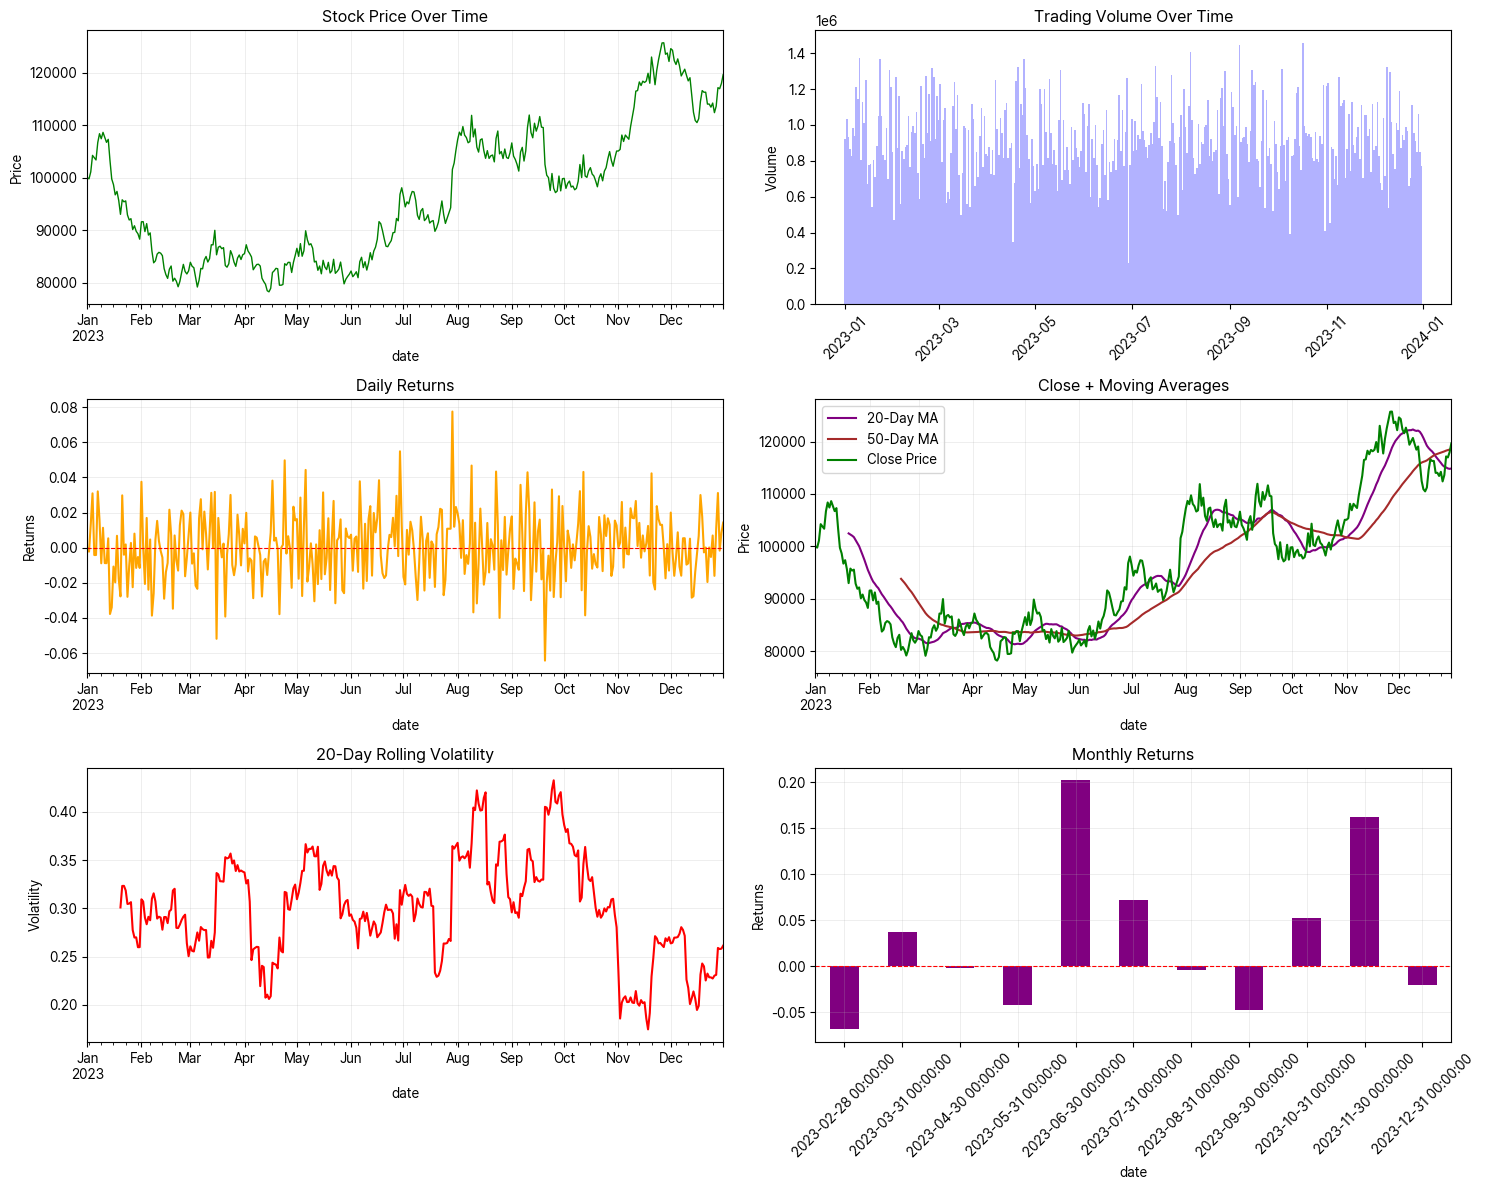

In [51]:
# 기본 주식 차트
plt.figure(figsize=(15, 12))

# 주가 추이
plt.subplot(3, 2, 1)
df['close'].plot(linewidth=1, title='Stock Price Over Time', color='green')
# plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.3)

#  거래량 추이
plt.subplot(3, 2, 2)
# bar 그래프, x축, y축
# df['volume'].plot(kind='bar', title='Trading Volume Over Time', color='blue')
plt.bar(df.index, df['volume'], width=1, color='blue', alpha=0.3)
plt.title('Trading Volume Over Time')
# plt.xlabel('Date')    # 이거 안 써도 되긴 함
plt.ylabel('Volume')
plt.xticks(rotation=45)

# 일일 수익률
plt.subplot(3, 2, 3)
df['returns'].plot(title='Daily Returns', color='orange')
# plt.xlabel('Date')    # 이거 안 써도 되긴 함
plt.ylabel('Returns')
plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.3)
plt.axhline(y=0, color='red', linewidth=0.8, linestyle='--')
            # 'y=' 꼭 안 써도 됨.

# 이동평균
plt.subplot(3, 2, 4)
# 아래는 copilot 버전
df['close'].rolling(window=20).mean().plot(label='20-Day MA', color='purple')
df['close'].rolling(window=50).mean().plot(label='50-Day MA', color='brown')
df['close'].plot(label='Close Price', color='green')

plt.title('Close + Moving Averages')
# plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.3)

# 변동성(volatility)
plt.subplot(3, 2, 5)
df['volatility'] = df['returns'].rolling(window=20).std() * np.sqrt(252)
# std(): 표준편차 구하는 공식.
# np.sqrt(252): 연간 변동성으로 변환 (일일 변동성을 연간 변동성으로 변환)
# 252는 주식 시장의 거래일 수 (평균)
df['volatility'].plot(title='20-Day Rolling Volatility(Annualized)', color='red')
plt.title('20-Day Rolling Volatility')
# plt.xlabel('Date')    # 이거 안 써도 되긴 함
plt.ylabel('Volatility')
plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.3)

# 월별 수익률
plt.subplot(3, 2, 6)
#월말 기준 종가 변동률(1월은 버림)
monthly_returns = df['close'].resample('ME').last().pct_change().dropna()
monthly_returns.plot(kind='bar', title='Monthly Returns', color='purple')
plt.title('Monthly Returns')
plt.ylabel('Returns')
plt.xticks(rotation=45)
plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.3)
plt.axhline(y=0, color='red', linewidth=0.8, linestyle='--')


plt.tight_layout()
plt.show()


In [68]:
# 기술적 지표 계산
# RSI (Relative Strength Index): 상대 강도 지수
def calculate_rsi(prices: pd.Series, window=14):
    delta = prices.diff()
    gain = delta.where(delta > 0, 0).rolling(window=window).mean().fillna(0)
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean().fillna(0) # abs왜 안 썼지?
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# 볼링거 밴드 (Bollinger Bands)
def calculate_bollinger_bands(prices: pd.Series, window=20, num_std=2):
    rolling_mean = prices.rolling(window=window).mean()
    rolling_std = prices.rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)
    return upper_band, lower_band

df['rsi'] = calculate_rsi(df['close'])
df['bb_upper'], df['bb_lower'] = calculate_bollinger_bands(df['close'])
        

delta = df['close'].diff()
(-delta.where(delta > 0, 0)).rolling(window=14).mean()

df.tail()

/var/folders/tx/t7px7cn503bgk6zlg3m0b4740000gn/T/ipykernel_76808/3113450790.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rsi'] = calculate_rsi(df['close'])
/var/folders/tx/t7px7cn503bgk6zlg3m0b4740000gn/T/ipykernel_76808/3113450790.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bb_upper'], df['bb_lower'] = calculate_bollinger_bands(df['close'])


,volume,open,close,high,low,returns,ma_20,ma_60,volatility,rsi,bb_upper,bb_lower
date,,,,,,,,,,,,
2023-12-27,9.087687e+05,112355.611347,113619.495550,114333.927109,112208.136779,0.010887,115203.704272,116097.314874,0.231025,44.399750,121415.225179,108992.183366
2023-12-28,8.479129e+05,113598.349691,117159.285740,114454.133340,113511.047220,0.031155,115059.912923,116347.001526,0.258933,62.533314,120923.942147,109195.883698
2023-12-29,1.061140e+06,117585.528528,116963.020156,118033.715629,117321.130433,-0.001675,114873.902826,116567.113257,0.257798,67.456469,120198.042493,109549.763160
2023-12-30,8.493769e+05,116993.398895,117961.209991,118502.324479,116232.938782,0.008534,114795.964677,116781.886926,0.258203,70.846430,119873.670556,109718.258798
2023-12-31,7.728247e+05,118393.325541,119648.395003,119190.327330,118193.649666,0.014303,114855.696264,117024.636798,0.261334,72.308054,120138.537268,109572.855260


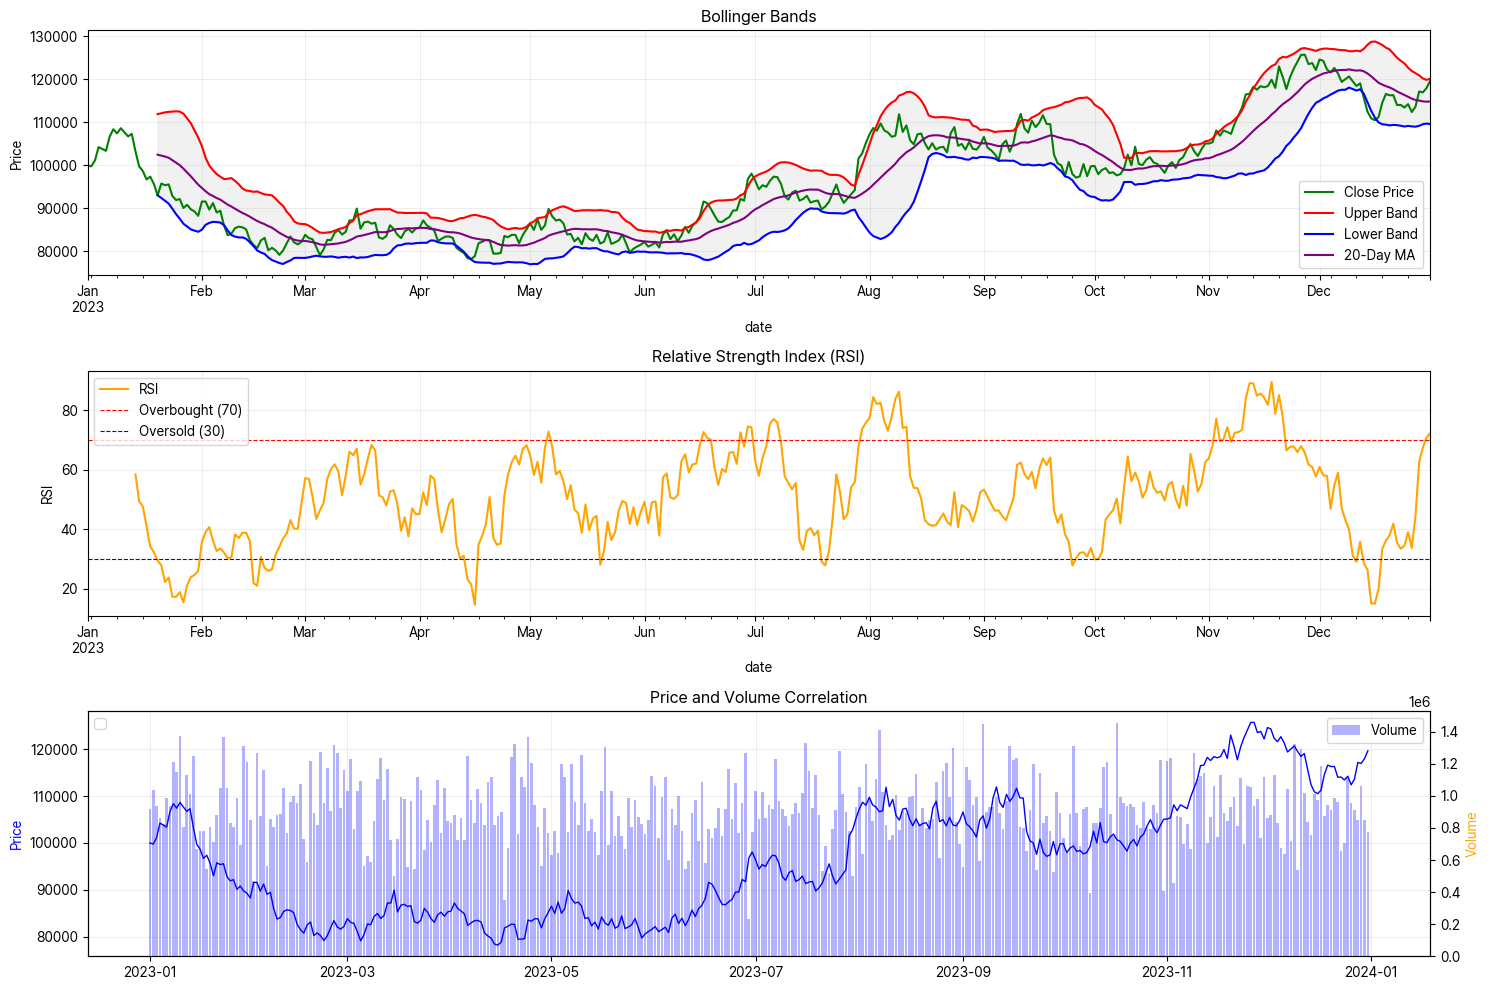

In [88]:
# 기술 분석 차트
plt.figure(figsize=(15, 10))

# 볼링거 밴드 주가
plt.subplot(3, 1, 1)
ax = plt.gca()
df['close'].plot(label='Close Price', color='green', ax=ax )
df['bb_upper'].plot(label='Upper Band', color='red', ax=ax )
df['bb_lower'].plot(label='Lower Band', color='blue', ax=ax )
df['ma_20'].plot(label='20-Day MA', color='purple', ax=ax )
plt.fill_between(
    df.index,
    df['bb_upper'],
    df['bb_lower'],
    color='lightgray',
    alpha=0.3
)
plt.title('Bollinger Bands')
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.3)

# RSI 차트
plt.subplot(3, 1, 2)
df['rsi'].plot(label='RSI', color='orange')
plt.axhline(y=70, color='red', linestyle='--', linewidth=0.8, label='Overbought (70)')
plt.axhline(y=30, color='blue', linestyle='--', linewidth=0.8, label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.ylabel('RSI')
plt.legend()
plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.3)

# 거래량 차트
# plt.subplot(3, 1, 3)
# df['volume'].plot(kind='bar', title='Trading Volume', color='blue', alpha=0.3)
# plt.title('Trading Volume')
# plt.ylabel('Volume')
# plt.xticks(rotation=45)
# plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.3)

# 거래량 <-> 가격 상관관계
plt.subplot(3, 1, 3)
ax1 = plt.gca()
ax2 = ax1.twinx()  # 두 번째 y축 생성
ax1.plot(df.index, df['close'], '-b', label='Stock Price', linewidth=1)
ax2.bar(df.index, df['volume'], label='Volume', color='blue', alpha=0.3)
ax1.set_title('Price and Volume Correlation')
ax1.set_ylabel('Price', color='blue')
ax2.set_ylabel('Volume', color='orange')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True, linestyle='-', linewidth=0.5, alpha=0.3)
line1, line1 = ax1.get_legend_handles_labels()
line2, line2 = ax1.get_legend_handles_labels()
ax1.legend(line1 + line2, ['Stock Price', 'Volume'], loc='upper left')

plt.tight_layout()
plt.show()

Mean Daily Return: 0.07%
Cumulative Return: 19.65%
Annualized Volatility: 30.09%
Sharpe Ratio: 0.123
Max Drawdown: -27.99%
Monthly average return: 3.12%
Monthly volatility: 8.67%
Correlation Matrix:
            close  volume  returns  volatility
close       1.000   0.047    0.098      -0.148
volume      0.047   1.000   -0.078      -0.038
returns     0.098  -0.078    1.000      -0.061
volatility -0.148  -0.038   -0.061       1.000


/var/folders/tx/t7px7cn503bgk6zlg3m0b4740000gn/T/ipykernel_76808/2659657615.py:36: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_perf = df['close'].resample('M').last().pct_change().dropna()


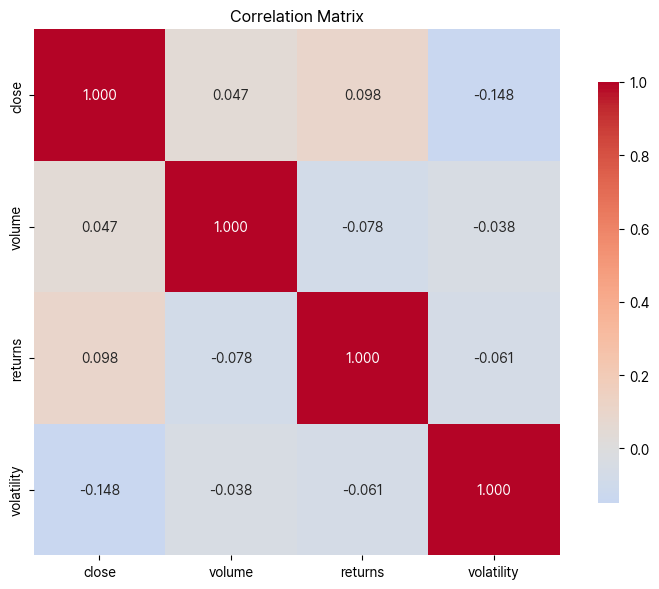

In [106]:
# 수익률 분석
daily_returns = df['returns'].dropna()  # 결측치 제거
mean_daily_return = daily_returns.mean() * 100  # 평균 일일 수익률
print(f"Mean Daily Return: {mean_daily_return:.2f}%")

# 누적 수익률
# 마지막 날의 종가
cum_return = (df['close'].iloc[-1] / df['close'].iloc[0] - 1) * 100
print(f"Cumulative Return: {cum_return:.2f}%")

# 변동성 분석
annualized_volatility = df['returns'].std() * np.sqrt(252)
print(f"Annualized Volatility: {annualized_volatility:.2%}")

# ~.2f}%' == ~.2%}'

# 샤프 비율(Sharpe Ratio) : 위험 조정 수익률, 높을수록 좋음
risk_free_rate = 0.03  # 무위험 이자율 (예: 3%), 은행 예금같은 거
sharpe_ratio = (mean_daily_return - risk_free_rate) / annualized_volatility
# mean_daily_return = df['returns'].mean() * 252  # 연간 평균 수익률
# annualized_volatility = df['returns'].std() * np.sqrt(252)  # 연간 변동성
print(f"Sharpe Ratio: {sharpe_ratio:.3f}")

# 최대 낙폭(Max Drawdown) : 최대 손실
# def calculate_max_drawdown(prices: pd.Series):
#     cumulative_returns = (prices / prices.cummax()) - 1
#     max_drawdown = cumulative_returns.min()
#     return max_drawdown
cum_wealth = (1 + df['returns']).cumprod()
running_max = cum_wealth.expanding().max()
drawdown = (cum_wealth - running_max) / running_max
max_drawdown = drawdown.min()
print(f"Max Drawdown: {max_drawdown:.2%}")

# 월별성과요약
monthly_perf = df['close'].resample('M').last().pct_change().dropna()
print(f'Monthly average return: {monthly_perf.mean() * 100:.2f}%')
print(f'Monthly volatility: {monthly_perf.std() * 100:.2f}%')

# 상관관계
correlation_matrix = df[['close', 'volume', 'returns', 'volatility']].corr()
print("Correlation Matrix:")
print(correlation_matrix.round(3))
# 상관관계 시각화
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', square=True, cbar_kws={"shrink": .8}, center=0)
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

/Users/jun-seokoh/.pyenv/versions/3.13.2/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jun-seokoh/.pyenv/versions/3.13.2/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jun-seokoh/.pyenv/versions/3.13.2/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jun-seokoh/.pyenv/versions/3.13.2/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jun-seokoh/.pyenv/versions/3.13.2/lib/python3.13/site-packages/IPython/core/

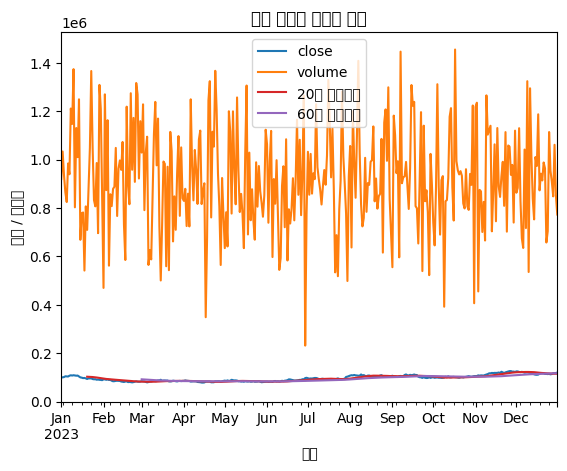

['종가 시계열 그래프', <Axes: title={'center': '주식 데이터 시계열 분석'}, xlabel='날짜', ylabel='가격 / 거래량'>, '거래량 시계열 그래프', <Axes: title={'center': '주식 데이터 시계열 분석'}, xlabel='날짜', ylabel='가격 / 거래량'>, '일별 수익률 히스토그램', <Axes: title={'center': '주식 데이터 시계열 분석'}, xlabel='날짜', ylabel='가격 / 거래량'>, '종가와 거래량 산점도', <matplotlib.collections.PathCollection object at 0x10ba7b8c0>, '이동평균선 그래프', <Axes: title={'center': '주식 데이터 시계열 분석'}, xlabel='날짜', ylabel='가격 / 거래량'>, <Axes: title={'center': '주식 데이터 시계열 분석'}, xlabel='날짜', ylabel='가격 / 거래량'>, <matplotlib.legend.Legend object at 0x10ba7b770>, Text(0.5, 1.0, '주식 데이터 시계열 분석'), Text(0.5, 24.0, '날짜'), Text(24.000000000000007, 0.5, '가격 / 거래량'), None]


In [7]:
# stock_data에서 시각화할 수 있는 분석 예시:
# 1. 종가(close) 시계열 그래프
# 2. 거래량(volume) 시계열 그래프
# 3. 일별 수익률(returns) 히스토그램
# 4. 종가와 거래량의 상관관계 산점도
# 5. 이동평균선(예: 20일, 60일) 그래프

# 예시 코드:
print([
    "종가 시계열 그래프",
    stock_data['close'].plot(),
    "거래량 시계열 그래프",
    stock_data['volume'].plot(),
    "일별 수익률 히스토그램",
    stock_data['returns'].hist(bins=50),
    "종가와 거래량 산점도",
    plt.scatter(stock_data['close'], stock_data['volume'], alpha=0.5),
    "이동평균선 그래프",
    stock_data['close'].rolling(window=20).mean().plot(label='20일 이동평균'),
    stock_data['close'].rolling(window=60).mean().plot(label='60일 이동평균'),
    plt.legend(),
    plt.title('주식 데이터 시계열 분석'),
    plt.xlabel('날짜'),
    plt.ylabel('가격 / 거래량'),
    plt.show()
])



/var/folders/tx/t7px7cn503bgk6zlg3m0b4740000gn/T/ipykernel_76808/3917358467.py:41: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.97])
/var/folders/tx/t7px7cn503bgk6zlg3m0b4740000gn/T/ipykernel_76808/3917358467.py:41: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.97])
/var/folders/tx/t7px7cn503bgk6zlg3m0b4740000gn/T/ipykernel_76808/3917358467.py:41: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.97])
/var/folders/tx/t7px7cn503bgk6zlg3m0b4740000gn/T/ipykernel_76808/3917358467.py:41: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.97])
/var/folders/tx/t7px7cn503bgk6zlg3m0b4740000gn/T/ipykernel_76808/3917358467.py:41: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu 

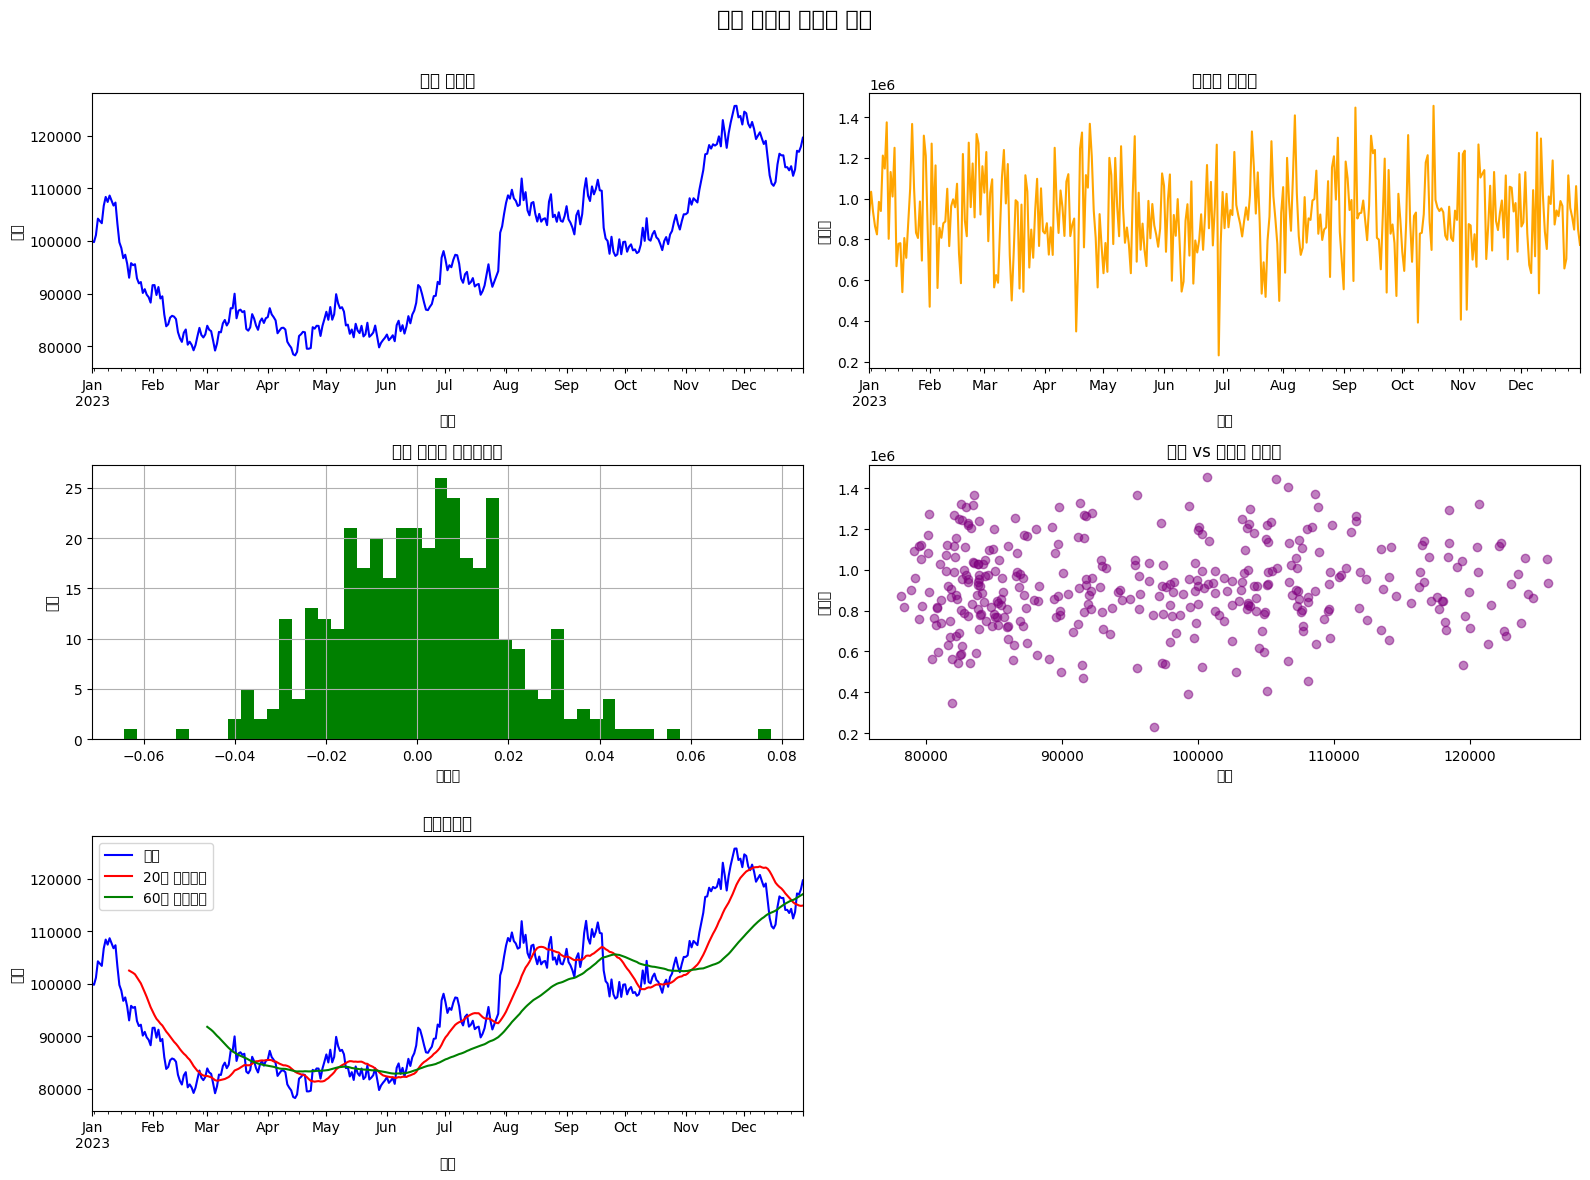

In [8]:
# 5개 그래프를 subplot으로 시각화
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle('주식 데이터 시계열 분석', fontsize=16)

# 1. 종가 시계열 그래프
stock_data['close'].plot(ax=axes[0, 0], color='blue')
axes[0, 0].set_title('종가 시계열')
axes[0, 0].set_xlabel('날짜')
axes[0, 0].set_ylabel('가격')

# 2. 거래량 시계열 그래프
stock_data['volume'].plot(ax=axes[0, 1], color='orange')
axes[0, 1].set_title('거래량 시계열')
axes[0, 1].set_xlabel('날짜')
axes[0, 1].set_ylabel('거래량')

# 3. 일별 수익률 히스토그램
stock_data['returns'].hist(bins=50, ax=axes[1, 0], color='green')
axes[1, 0].set_title('일별 수익률 히스토그램')
axes[1, 0].set_xlabel('수익률')
axes[1, 0].set_ylabel('빈도')

# 4. 종가와 거래량 산점도
axes[1, 1].scatter(stock_data['close'], stock_data['volume'], alpha=0.5, color='purple')
axes[1, 1].set_title('종가 vs 거래량 산점도')
axes[1, 1].set_xlabel('종가')
axes[1, 1].set_ylabel('거래량')

# 5. 이동평균선 그래프
stock_data['close'].plot(ax=axes[2, 0], label='종가', color='blue')
stock_data['close'].rolling(window=20).mean().plot(ax=axes[2, 0], label='20일 이동평균', color='red')
stock_data['close'].rolling(window=60).mean().plot(ax=axes[2, 0], label='60일 이동평균', color='green')
axes[2, 0].set_title('이동평균선')
axes[2, 0].set_xlabel('날짜')
axes[2, 0].set_ylabel('가격')
axes[2, 0].legend()

# 빈 subplot 제거
fig.delaxes(axes[2, 1])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()